<a href="https://colab.research.google.com/github/ReyFrank92/joyofcoding/blob/main/RNN_Airline_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#Install TensorFlow
!pip install -q tensorflow-gpu==2.9.1
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 511.7 MB 4.6 kB/s 
2.9.0


In [127]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense,  GRU, LSTM, GlobalMaxPool1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [74]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
np.random.seed(0)
tf.random.set_seed(0)

In [76]:
# N = number of samples
# T = sequence length
# D = number of input features
# M = number of hideen units 
# K = number of output units

In [77]:
from sklearn.metrics import mean_absolute_percentage_error

In [78]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [79]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [80]:
df['LogPassengers'] = np.log(df['Passengers'])

In [81]:
Ntest = 12
train = df.iloc[:-Ntest] #todos -12
test = df.iloc[-Ntest:] #solo las últimas 12 observaciones

In [82]:
from typing import ValuesView
ValuesView(df)

ValuesView(            Passengers  LogPassengers
Month                                
1949-01-01         112       4.718499
1949-02-01         118       4.770685
1949-03-01         132       4.882802
1949-04-01         129       4.859812
1949-05-01         121       4.795791
...                ...            ...
1960-08-01         606       6.406880
1960-09-01         508       6.230481
1960-10-01         461       6.133398
1960-11-01         390       5.966147
1960-12-01         432       6.068426

[144 rows x 2 columns])

In [83]:
ValuesView(train)

ValuesView(            Passengers  LogPassengers
Month                                
1949-01-01         112       4.718499
1949-02-01         118       4.770685
1949-03-01         132       4.882802
1949-04-01         129       4.859812
1949-05-01         121       4.795791
...                ...            ...
1959-08-01         559       6.326149
1959-09-01         463       6.137727
1959-10-01         407       6.008813
1959-11-01         362       5.891644
1959-12-01         405       6.003887

[132 rows x 2 columns])

In [84]:
ValuesView(test)

ValuesView(            Passengers  LogPassengers
Month                                
1960-01-01         417       6.033086
1960-02-01         391       5.968708
1960-03-01         419       6.037871
1960-04-01         461       6.133398
1960-05-01         472       6.156979
1960-06-01         535       6.282267
1960-07-01         622       6.432940
1960-08-01         606       6.406880
1960-09-01         508       6.230481
1960-10-01         461       6.133398
1960-11-01         390       5.966147
1960-12-01         432       6.068426)

In [85]:
# boolean series to index df rows []
train_idx = df.index <= train.index[-1] #pone true a lo que sea train del data set y lo demás false
test_idx = df.index > train.index[-1] # pone true a lo que sea del test solamente y lo demás false

In [86]:
df['DiffLogPassengers'] = df['LogPassengers'].diff() #crea una nueva columna con la diferencia del logaritmo de los pasajeros

In [87]:
#Make supervised dataset
series = df['DiffLogPassengers'].dropna().to_numpy()

T = 10
X = []
Y = []
for t in range(len(series) - T): #corre en el rango de 144-10 = 134- 
  x = series[t:t+T] #e.g. si t =1 entonces corre de 1 a 11
  X.append(x) #agrega lo anterior
  y = series[t+T] # e.g. si t = 1 entonces y es 11
  Y.append(y) #aagrega lo anterior

X = np.array(X).reshape(-1,T,1) #el tensor es una caja
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape",Y.shape)

X.shape (133, 10, 1) Y.shape (133,)


In [88]:
Xtrain, Ytrain = X[: -Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [89]:
#RNN 
i = Input(shape=(T,1))
x = LSTM(24)(i)
x = Dense(1)(x)
model = Model(i,x)

In [90]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_1 (LSTM)               (None, 24)                2496      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(
    loss='mse',
    optimizer='adam',
)

In [92]:
r = model.fit(
    Xtrain,
    Ytrain,
    epochs=100,
    validation_data=(Xtest,Ytest)
)

Epoch 1/100
4/4 [==============================] - 3s 186ms/step - loss: 0.0116 - val_loss: 0.0112
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0112 - val_loss: 0.0109
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0110 - val_loss: 0.0106
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0101 - val_loss: 0.0095
Epoch 8/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 9/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0095 - val_loss: 0.0087
Epoch 10/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0090 - val_loss: 0.0081
Epoch 11/100
4/4 [

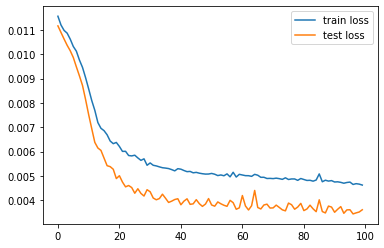

In [93]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [94]:
train_idx[:T+1] = False # First T+1 values are not predictable

In [95]:
print(train_idx[:T+1]) #Mwe imprime lo que tenemos False en el entrenamiento 

[False False False False False False False False False False False]


In [96]:
Ptrain = model.predict(Xtrain).flatten()
Ptest = model.predict(Xtest).flatten()

1/1 [==============================] - 0s 28ms/step


In [97]:
print(Ptrain.shape)

(121,)


In [98]:
print(Ptest.shape)

(12,)


In [99]:
print(series.shape)

(143,)


In [100]:
143-121-12 #es 10 porque el T = 10. 

10

In [101]:
#Needed to compute un-differenced predictions
df['ShiftLogPassengers'] = df['LogPassengers'].shift(1) #cambia 1 periodo hacia adelante los datos
prev = df['ShiftLogPassengers']
ValuesView(prev.tail())

ValuesView(Month
1960-08-01    6.432940
1960-09-01    6.406880
1960-10-01    6.230481
1960-11-01    6.133398
1960-12-01    5.966147
Name: ShiftLogPassengers, dtype: float64)

In [102]:
print(prev.shape)

(144,)


In [103]:
# Last-known train value
last_train = train.iloc[-1]['LogPassengers']

In [104]:
ValuesView(last_train)

ValuesView(6.003887067106539)

In [105]:
# 1-step forecast[]
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain #Te regresa las 121 observaciones con true //con el loc me regresa del df algo en específico //prev[train_idx] =121 lenght + 121 lenght ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest #Te regresa las 12 observaciones con true // prev[test_idx] 12 lenght + ptest 12 lenght

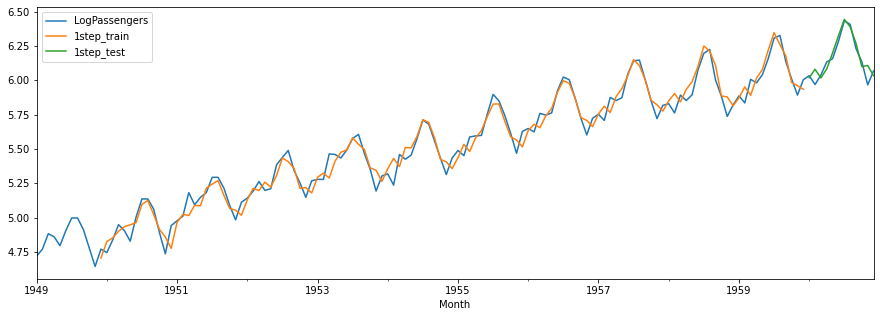

In [106]:
# Plot 1-step forecast []
df[['LogPassengers','1step_train','1step_test']].plot(figsize=(15,5));

In [116]:
#multi-step forecast
multistep_predictions = []

# first test input
last_x = Xtest[0] #acá hay 10 observaciones

while len(multistep_predictions) < Ntest:#Ntest es 12, entonces el while es hasta 11. Prediceme las sig 12 observaciones. Recuerda que 11 es la 12 porque se incluye el 0
  p = model.predict(last_x.reshape(1,-1, 1))[0]#damelo en 1 fila por x columnas que no se cuantas son. (el que debe de ir es 1,-1)
  #update the predictions list
  multistep_predictions.append(p)#añademe el resultado a p

  #make the new input
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

1/1 [==============================] - 0s 23ms/step


In [119]:
print(p)

[0.01812311]


In [117]:
#save multi-step forecast to dataframe
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

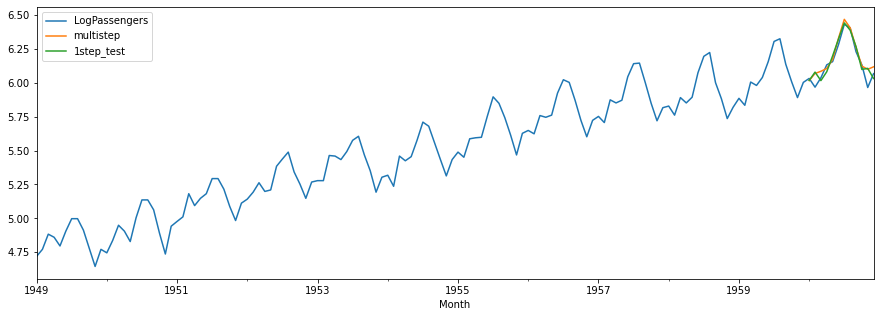

In [118]:
#plot 1-step and multi-step forecast
df[['LogPassengers','multistep','1step_test']].plot(figsize=(15,5));

In [122]:
# make multi-output supevised dataset
Tx = T
Ty = Ntest
X = []
Y = []
for t in range(len(series)- Tx -Ty +1):
  x = series[t:t+Tx] #si t es 1 enotnces corre de 1 a 11
  X.append(x)
  y =series[t+Tx:t+Tx+Ty] #si t es 1, entonces corre de 11 a (1+10+12 = 23)
  Y.append(y)

X = np.array(X).reshape(-1, Tx, 1)
Y = np.array(Y).reshape(-1,Ty)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (122, 10, 1) Y.shape (122, 12)


In [123]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [134]:
#RNN
i = Input(shape=(Tx,1))
x = LSTM(24, return_sequences=True)(i)
x = GlobalMaxPool1D()(x) #NameError: name 'GlobalMaxPooling1D' is not defined
x = Dense(Ty)(x) #en este caso es 12 =Ty
model = Model(i,x)

In [135]:
check_point = ModelCheckpoint(
    'best_model.h5', monitor='val_loss',save_best_only=True
)

In [136]:
model.compile(
    loss='mse',
    optimizer='adam',
)

In [141]:
r = model.fit(
    Xtrain_m,
    Ytrain_m,
    epochs=300,
    validation_data=(Xtest_m, Ytest_m),
    callbacks=[check_point],
)

Epoch 1/300
4/4 [==============================] - 4s 209ms/step - loss: 0.0116 - val_loss: 0.0111
Epoch 2/300
4/4 [==============================] - 0s 20ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 3/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0114 - val_loss: 0.0110
Epoch 4/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0113 - val_loss: 0.0109
Epoch 5/300
4/4 [==============================] - 0s 22ms/step - loss: 0.0113 - val_loss: 0.0107
Epoch 6/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0112 - val_loss: 0.0105
Epoch 7/300
4/4 [==============================] - 0s 22ms/step - loss: 0.0112 - val_loss: 0.0104
Epoch 8/300
4/4 [==============================] - 0s 24ms/step - loss: 0.0111 - val_loss: 0.0104
Epoch 9/300
4/4 [==============================] - 0s 19ms/step - loss: 0.0110 - val_loss: 0.0105
Epoch 10/300
4/4 [==============================] - 0s 20ms/step - loss: 0.0110 - val_loss: 0.0103
Epoch 11/300
4/4 [

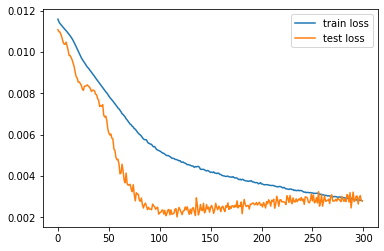

In [144]:
#Plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [145]:
#load best model
best_model = tf.keras.models.load_model('best_model.h5')

In [146]:
Ptrain = model.predict(Xtrain_m)
Ptest = model.predict(Xtest_m)

1/1 [==============================] - 0s 57ms/step


In [147]:
Ptrain.shape, Ptest.shape

((121, 12), (1, 12))

In [148]:
Ptrain = Ptrain[:,0]
Ptest = Ptest [0]

In [150]:
print(Ptest)

[ 0.07275502 -0.09870896  0.13866356  0.01025806  0.0219121   0.17501074
  0.10229666  0.03305747 -0.1425989  -0.14096227 -0.0900812   0.06904694]


In [151]:
# save multi-output forecast to dataframe []
df.loc[test_idx, 'multioutput'] = last_train + \
  np.cumsum(Ptest)

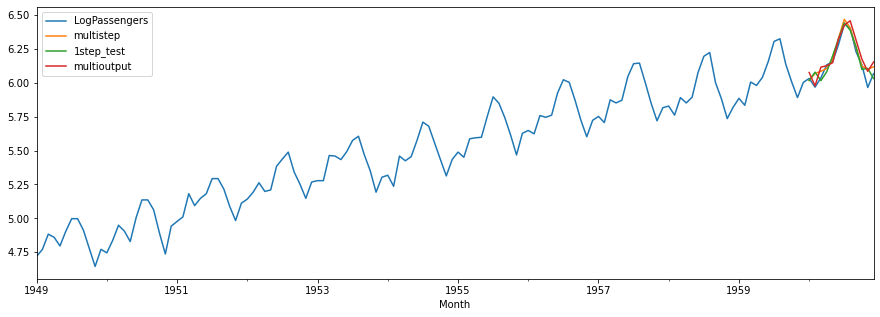

In [152]:
#plot all forecasts
cols = ['LogPassengers', 'multistep', '1step_test','multioutput']
df[cols].plot(figsize=(15,5));

In [153]:
#RNN multiple LSTM Layers
i = Input(shape=(Tx,1)) #recuerda Tx = T 
x = LSTM(16, return_sequences=True)(i)
x = LSTM(16, return_sequences=True)(x)
x = GlobalMaxPool1D()(x) #convertir la secuencia en 1 solo vector y aplicar solo una capa de densidad al final
x = Dense(Ty)(x) #Ty = Ntest el cual es 12 en el ejemplo
model = Model(i,x)

In [155]:
check_point = ModelCheckpoint(
    'best_model.h5',monitor='val_loss',save_best_only=True)


In [156]:
model.compile(
    loss='mse',
    optimizer='adam',
)

In [157]:
r = model.fit(
    Xtrain_m,
    Ytrain_m,
    epochs=300,
    validation_data=(Xtest_m,Ytest_m),
)

Epoch 1/300
4/4 [==============================] - 14s 599ms/step - loss: 0.0115 - val_loss: 0.0115
Epoch 2/300
4/4 [==============================] - 0s 31ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 3/300
4/4 [==============================] - 0s 32ms/step - loss: 0.0113 - val_loss: 0.0112
Epoch 4/300
4/4 [==============================] - 0s 33ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 5/300
4/4 [==============================] - 0s 30ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 6/300
4/4 [==============================] - 0s 33ms/step - loss: 0.0112 - val_loss: 0.0110
Epoch 7/300
4/4 [==============================] - 0s 30ms/step - loss: 0.0112 - val_loss: 0.0109
Epoch 8/300
4/4 [==============================] - 0s 27ms/step - loss: 0.0111 - val_loss: 0.0109
Epoch 9/300
4/4 [==============================] - 0s 32ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 10/300
4/4 [==============================] - 0s 33ms/step - loss: 0.0111 - val_loss: 0.0109
Epoch 11/300
4/4 

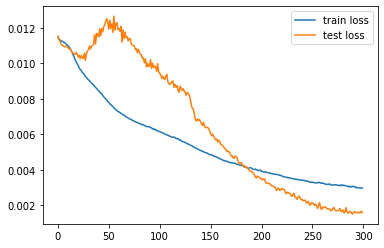

In [158]:
#Plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [159]:
#load best model 
best_model = tf.keras.models.load_model('best_model.h5')


In [160]:
Ptrain = model.predict(Xtrain_m)
Ptest = model.predict(Xtest_m)

Ptrain = Ptrain[:,0]
Ptest = Ptest[0]

1/1 [==============================] - 0s 23ms/step


In [162]:
print(Ptest)

[ 0.05049395 -0.05559426  0.119016    0.01444107 -0.00914078  0.15603045
  0.16061495 -0.00098005 -0.12957552 -0.13370182 -0.11805278  0.07579052]


In [168]:
print(last_train)

6.003887067106539


In [170]:
print(Ptest)

[ 0.05049395 -0.05559426  0.119016    0.01444107 -0.00914078  0.15603045
  0.16061495 -0.00098005 -0.12957552 -0.13370182 -0.11805278  0.07579052]


In [169]:
print( np.cumsum(Ptest))

[ 0.05049395 -0.00510031  0.11391569  0.12835675  0.11921598  0.27524644
  0.4358614   0.43488136  0.30530584  0.17160402  0.05355124  0.12934175]


In [163]:
#save multi-output forecast to dataframe []
df.loc[test_idx, 'multioutput2'] = last_train + \
  np.cumsum(Ptest)

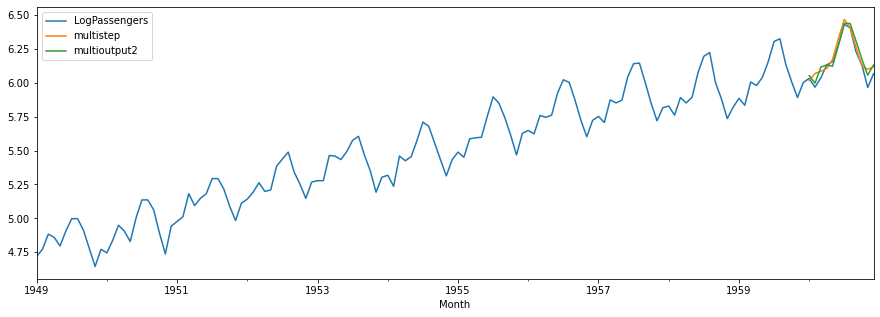

In [165]:
# plot all forecasts
cols = ['LogPassengers', 'multistep','multioutput2']
df[cols].plot(figsize=(15,5));

In [167]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogPassengers']
mape1 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(
    test_log_pass,df.loc[test_idx,'multioutput'])
print("multi-output MAPE:", mape2)
mape3 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multioutput2'])
print("multi-output(2 LSTMs MAPE:", mape3)

multi-step MAPE: 0.0070863595384320485
multi-output MAPE: 0.007909615991685092
multi-output(2 LSTMs MAPE: 0.006625729381126665


In [ ]:
# Excersise: 
# is the improvement due to glboal max pooling? or Due to multiple LSTMs layers?
# Do you think differencing is unnecesary? try it!
#do you think logging is unnecesary? Try it!
# do you think inlcuding more past lags would be useful?
# have you considered walk-forward validation to optimize hyperparameters? 